<center> <h2> FIFA Dataset Analysis (Web Scraping) </h2>  </center>
<h3> By- Pranjal Singhal </h3>

### Importing All the Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

### Scrap web data

In [2]:
url = "https://sofifa.com/players?offset=1"
req = requests.get(url)

In [3]:
req


<Response [200]>

In [4]:
soup = BeautifulSoup(req.content)
soup

<!DOCTYPE html>
<html lang="en-US">
<head><title>Players FIFA 22 Dec 20, 2021 SoFIFA</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>
<meta content="FIFA 22 player ratings on Dec 20, 2021" name="description"/>
<meta content="Khachin Borjigin" name="author"/>
<meta content="2009 - 2021 SoFIFA.com" name="copyright"/>
<meta content="light" name="twitter:widgets:theme"/>
<meta content="#e6e6e6" name="twitter:widgets:border-color"/>
<link href="/launcher-icon.png" rel="shortcut icon"/>
<link href="/launcher-icon.png" rel="apple-touch-icon"/>
<link href="https://cdn.sofifa.net" rel="preconnect"/>
<link href="https://cdn.sofifa.net" rel="dns-prefetch"/>
<link href="https://config.playwire.com/" rel="preconnect"/>
<link href="https://config.playwire.com/" rel="dns-prefetch"/>
<link href="https://cdn.intergient.com/" rel="preconnect"/>
<link href="ht

In [5]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Players FIFA 22 Dec 20, 2021 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 22 player ratings on Dec 20, 2021" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2021 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link href="https://cdn.sofifa.net" rel="preconnect"/>\n  <link href="https://cdn.sofifa.net" rel="dns-prefetch"/>\n  <link href="https://config.playwire.com/" rel="preconnect"/>\n  <link href="https://config.playwire.com/" rel="dns-prefetch"/>\n  <link href="

## Data Cleaning(1 page)


In [6]:
# Columns we need = Image link, player_name, Position, Age, OVA, POT, Team, Duration, Value, Wage, Total_Stats

In [7]:
arr = []
for i in soup.findAll('tr'):
  arr.append(i)


In [8]:
arr[0]

<tr class="persist-header">
<th class="col-avatar"></th>
<th class="col-name text-left">Name</th><th class="tooltip col col-ae" data-tooltip="Age"><a class="pjax ellipsis" href="/players?col=ae&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Age</a></th><th class="tooltip col col-oa" data-tooltip="Overall Rating"><a class="pjax ellipsis" href="/players?col=oa&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>OVA</a></th><th class="tooltip col col-pt" data-tooltip="Potential"><a class="pjax ellipsis" href="/players?col=pt&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>POT</a></th><th class="tooltip col-name text-left" data-tooltip="Team &amp; Contract"><a class="pjax ellipsis" href="/players?col=tm&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Team &amp; Contract</a></th>
<th class="tooltip col col-vl" data-tooltip="Value"><a class="pjax ellipsis" href="/players?col=vl&amp;sort=asc" rel="nofollow"><span class="bp

In [9]:
arr[3]

<tr>
<td class="col-avatar"><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/031/432/17_60.png" data-srcset="https://cdn.sofifa.net/players/031/432/17_120.png 2x, https://cdn.sofifa.net/players/031/432/17_180.png 3x" data-type="player" id="31432" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a class="tooltip" data-tooltip="Didier Drogba" href="/player/31432/didier-drogba/170099/"><div class="ellipsis"><span class="bp3-tag bp3-minimal bp3-intent-success">17</span> D. Drogba</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/ci.png" data-srcset="https://cdn.sofifa.net/flags/ci@2x.png 2x, https://cdn.sofifa.net/flags/ci@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="Côte d'Ivoire" width="21"/> <a href="/players?pn=25" rel="nofollow"><span class="pos pos25">ST</span></a></td><td class="col col-ae" data-col="

In [10]:
del arr[0]

In [11]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/152/747/22_60.png" data-srcset="https://cdn.sofifa.net/players/152/747/22_120.png 2x, https://cdn.sofifa.net/players/152/747/22_180.png 3x" data-type="player" id="152747" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a class="tooltip" data-tooltip="Aaron Lennon" href="/player/152747/aaron-lennon/220022/"><div class="ellipsis">A. Lennon</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/gb-eng.png" data-srcset="https://cdn.sofifa.net/flags/gb-eng@2x.png 2x, https://cdn.sofifa.net/flags/gb-eng@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="England" width="21"/> <a href="/players?pn=12" rel="nofollow"><span class="pos pos12">RM</span></a> <a href="/players?pn=

In [12]:
re.sub('<img .*data-srcset="| .*/>',"",str(arr[0].find('img',{"class":"player-check"})))

'https://cdn.sofifa.net/players/152/747/22_120.png'

In [13]:
re.sub('<a.*tooltip="|" href.*a>',"",str(arr[0].find('a',{"class" : "tooltip"})))

'Aaron Lennon'

In [14]:
re.sub('<td.*">|</td>',"",str(arr[8].find('td',{'class':"col col-ae"})))

'16'

In [15]:
re.sub('<td.*">|<.*td>',"",str(arr[0].find('td',{'class' : "col col-oa"})))

'73'

In [16]:
re.sub('<td.*">|<.*td>',"",str(arr[0].find('td',{'class':"col col-pt"})))

'73'

In [17]:
re.sub('<div.*\n|</div>| <.*',"",str(arr[1].find('div',{'class':'sub'})))

'2021 ~ 2023'

In [18]:
re.sub('<td.*>€|M|</td>',"",str(arr[1].find('td',{"class":"col col-vl"})))

'51'

In [19]:
re.sub('<td.*">€|K</td>',"",str(arr[14].find('td',{'class':"col col-wg"})))

'51'

In [20]:
re.sub('<td.*">|</.*td>',"",str(arr[0].find('td',{"class":"col col-tt"})))

'1844'

In [21]:
list_s = [[] for _ in range(10)]
count = 0
for i in soup.findAll('tr'):
    Image_link = re.sub('<img .*data-srcset="| .*/>',"",str(i.find('img',{"class":"player-check"})))
    Name       = re.sub('<a.*tooltip="|" href.*a>',"",str(i.find('a',{"class" : "tooltip"})))
    Age        = re.sub('<td.*">|</td>',"",str(i.find('td',{'class':"col col-ae"})))
    OVA        = re.sub('<td.*">|<.*td>',"",str(i.find('td',{'class' : "col col-oa"})))
    POT        = re.sub('<td.*">|<.*td>',"",str(i.find('td',{'class':"col col-pt"})))
    Duration   = re.sub('<div.*\n|</div>| <.*',"",str(i.find('div',{'class':'sub'})))
    Value      = re.sub('<td.*>€|M|</td>|K',"",str(i.find('td',{"class":"col col-vl"})))
    Wage       = re.sub('<td.*">€|K</td>|</td>',"",str(i.find('td',{'class':"col col-wg"})))
    Total_stats= re.sub('<td.*">|</.*td>',"",str(i.find('td',{"class":"col col-tt"})))
    Team       = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;',"",str(i.findAll('a')[-1]))
    
    
    list_s[0].append(Image_link)
    list_s[1].append(Name)
    list_s[2].append(Age)
    list_s[3].append(OVA)
    list_s[4].append(POT)
    list_s[5].append(Team)
    list_s[6].append(Duration)
    list_s[7].append(Value)
    list_s[8].append(Wage)
    list_s[9].append(Total_stats)

In [22]:
fifa = pd.DataFrame({'Image_link':list_s[0],'Name':list_s[1],'Age':list_s[2],
                    'OVA':list_s[3],'POT':list_s[4],'Team':list_s[5],
                    'Duration':list_s[6],'Value':list_s[7],'Wage':list_s[8],
                    'Total_stats':list_s[9]})

In [23]:
fifa.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,None,None,None,None,None,"<a class=""pjax ellipsis"" href=""/players?col=tt...",None,None,None,None
1,https://cdn.sofifa.net/players/152/747/22_120.png,Aaron Lennon,34,73,73,Burnley,2021 ~ 2022,1.4,28,1844
2,https://cdn.sofifa.net/players/153/079/22_120.png,Sergio Agüero,33,87,87,FC Barcelona,2021 ~ 2023,51,260,2066
3,https://cdn.sofifa.net/players/031/432/17_120.png,Didier Drogba,38,81,81,Côte d'Ivoire,Free,0,0,1956
4,https://cdn.sofifa.net/players/256/008/22_120.png,Felipe Rodrigues da Silva,20,73,86,SL Benfica,2019 ~ 2024,7,7,1605


In [24]:
fifa.drop(0,inplace = True)

In [25]:
fifa.head(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.net/players/152/747/22_120.png,Aaron Lennon,34,73,73,Burnley,2021 ~ 2022,1.4,28,1844
2,https://cdn.sofifa.net/players/153/079/22_120.png,Sergio Agüero,33,87,87,FC Barcelona,2021 ~ 2023,51,260,2066
3,https://cdn.sofifa.net/players/031/432/17_120.png,Didier Drogba,38,81,81,Côte d'Ivoire,Free,0,0,1956
4,https://cdn.sofifa.net/players/256/008/22_120.png,Felipe Rodrigues da Silva,20,73,86,SL Benfica,2019 ~ 2024,7,7,1605
5,https://cdn.sofifa.net/players/240/833/22_120.png,Youssoufa Moukoko,16,69,89,Borussia Dortmund,2020 ~ 2022,3.8,5,1725
6,https://cdn.sofifa.net/players/192/505/22_120.png,Romelu Lukaku,28,88,88,Chelsea,2021 ~ 2026,93.5,260,2061
7,https://cdn.sofifa.net/players/246/430/22_120.png,Dušan Vlahović,21,80,86,Fiorentina,2018 ~ 2023,34,51,1827
8,https://cdn.sofifa.net/players/239/085/22_120.png,Erling Haaland,20,88,94,Borussia Dortmund,2020 ~ 2024,143.5,110,2112
9,https://cdn.sofifa.net/players/264/240/22_120.png,Pablo Martín Páez Gavira,16,70,86,FC Barcelona,2020 ~ 2023,4,8,1789
10,https://cdn.sofifa.net/players/150/995/22_120.png,Boris Rotenberg,35,61,61,FC Lokomotiv Moscow,2016 ~ 2021,100,5,1505


In [26]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   60 non-null     object
 1   Name         60 non-null     object
 2   Age          60 non-null     object
 3   OVA          60 non-null     object
 4   POT          60 non-null     object
 5   Team         60 non-null     object
 6   Duration     60 non-null     object
 7   Value        60 non-null     object
 8   Wage         60 non-null     object
 9   Total_stats  60 non-null     object
dtypes: object(10)
memory usage: 5.2+ KB


In [27]:
fifa['Age'] = pd.to_numeric(fifa['Age'])
fifa['OVA'] = pd.to_numeric(fifa['OVA'])
fifa['POT'] = pd.to_numeric(fifa['POT'])
fifa['Value'] = pd.to_numeric(fifa['Value'])
fifa['Wage'] = pd.to_numeric(fifa['Wage'])
fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

In [28]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   60 non-null     object 
 1   Name         60 non-null     object 
 2   Age          60 non-null     int64  
 3   OVA          60 non-null     int64  
 4   POT          60 non-null     int64  
 5   Team         60 non-null     object 
 6   Duration     60 non-null     object 
 7   Value        60 non-null     float64
 8   Wage         60 non-null     int64  
 9   Total_stats  60 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ KB


In [29]:
fifa

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.net/players/152/747/22_120.png,Aaron Lennon,34,73,73,Burnley,2021 ~ 2022,1.4,28,1844
2,https://cdn.sofifa.net/players/153/079/22_120.png,Sergio Agüero,33,87,87,FC Barcelona,2021 ~ 2023,51.0,260,2066
3,https://cdn.sofifa.net/players/031/432/17_120.png,Didier Drogba,38,81,81,Côte d'Ivoire,Free,0.0,0,1956
4,https://cdn.sofifa.net/players/256/008/22_120.png,Felipe Rodrigues da Silva,20,73,86,SL Benfica,2019 ~ 2024,7.0,7,1605
5,https://cdn.sofifa.net/players/240/833/22_120.png,Youssoufa Moukoko,16,69,89,Borussia Dortmund,2020 ~ 2022,3.8,5,1725
6,https://cdn.sofifa.net/players/192/505/22_120.png,Romelu Lukaku,28,88,88,Chelsea,2021 ~ 2026,93.5,260,2061
7,https://cdn.sofifa.net/players/246/430/22_120.png,Dušan Vlahović,21,80,86,Fiorentina,2018 ~ 2023,34.0,51,1827
8,https://cdn.sofifa.net/players/239/085/22_120.png,Erling Haaland,20,88,94,Borussia Dortmund,2020 ~ 2024,143.5,110,2112
9,https://cdn.sofifa.net/players/264/240/22_120.png,Pablo Martín Páez Gavira,16,70,86,FC Barcelona,2020 ~ 2023,4.0,8,1789
10,https://cdn.sofifa.net/players/150/995/22_120.png,Boris Rotenberg,35,61,61,FC Lokomotiv Moscow,2016 ~ 2021,100.0,5,1505


## Web scrapping and Data Cleaning of 10 web pages

In [154]:
def fifa_dataset(url):  
    fifa_final=pd.DataFrame()
    for j in range(1,11):
        url = url + str(j)
        req = requests.get(url)
        soup = BeautifulSoup(req.content)
        list_s = [[] for _ in range(10)]


        for i in soup.findAll('tr'):
            Image_link = re.sub('<img .*data-srcset="| .*/>',"",str(i.find('img',{"class":"player-check"})))
            Name       = re.sub('<a.*tooltip="|" href.*a>',"",str(i.find('a',{"class" : "tooltip"})))
            Age        = re.sub('<td.*">|</td>',"",str(i.find('td',{'class':"col col-ae"})))
            OVA        = re.sub('<td.*">|<.*td>',"",str(i.find('td',{'class' : "col col-oa"})))
            POT        = re.sub('<td.*">|<.*td>',"",str(i.find('td',{'class':"col col-pt"})))
            Duration   = re.sub('<div.*\n|</div>| <.*',"",str(i.find('div',{'class':'sub'})))
            Value      = re.sub('<td.*>€|M|</td>|K',"",str(i.find('td',{"class":"col col-vl"})))
            Wage       = re.sub('<td.*">€|K</td>|</td>',"",str(i.find('td',{'class':"col col-wg"})))
            Total_stats= re.sub('<td.*">|</.*td>',"",str(i.find('td',{"class":"col col-tt"})))
            Team       = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;',"",str(i.findAll('a')[-1]))


            list_s[0].append(Image_link)
            list_s[1].append(Name)
            list_s[2].append(Age)
            list_s[3].append(OVA)
            list_s[4].append(POT)
            list_s[5].append(Team)
            list_s[6].append(Duration)
            list_s[7].append(Value)
            list_s[8].append(Wage)
            list_s[9].append(Total_stats)

        fifa = pd.DataFrame({'Image_link':list_s[0],'Name':list_s[1],'Age':list_s[2],
                        'OVA':list_s[3],'POT':list_s[4],'Team':list_s[5],
                        'Duration':list_s[6],'Value':list_s[7],'Wage':list_s[8],
                        'Total_stats':list_s[9]})

        fifa.drop(0,inplace = True)

        fifa['Age'] = pd.to_numeric(fifa['Age'])
        fifa['OVA'] = pd.to_numeric(fifa['OVA'])
        fifa['POT'] = pd.to_numeric(fifa['POT'])
        fifa['Value'] = pd.to_numeric(fifa['Value'])
        fifa['Wage'] = pd.to_numeric(fifa['Wage'])
        fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

        fifa_final = fifa_final.append(fifa, ignore_index = True)

    return fifa_final.shape



In [155]:
fifa_dataset("https://sofifa.com/players?offset=")

(600, 10)

In [156]:
fifa_final

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/246/321/22_120.png,Daizen Maeda,23,71,74,Yokohama F. Marinos,2021 ~ 2022,2.6,8,1898
1,https://cdn.sofifa.net/players/246/191/22_120.png,Julián Álvarez,21,78,87,River Plate,2018 ~ 2022,32.0,16,2099
2,https://cdn.sofifa.net/players/232/623/22_120.png,Yosuke Ideguchi,24,69,72,Gamba Osaka,2019 ~ 2022,1.9,6,1859
3,https://cdn.sofifa.net/players/251/810/22_120.png,Brian Brobbey,19,73,85,RB Leipzig,2021 ~ 2025,7.5,31,1760
4,https://cdn.sofifa.net/players/210/021/22_120.png,Hany Mukhtar,26,75,77,Nashville SC,2020 ~ 2025,7.0,9,1934
...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.net/players/226/753/22_120.png,André Onana,25,83,86,Ajax,2015 ~ 2022,37.0,19,1474
596,https://cdn.sofifa.net/players/230/938/22_120.png,Franck Yannick Kessié,24,84,86,AC Milan,2019 ~ 2022,49.5,51,2195
597,https://cdn.sofifa.net/players/241/721/22_120.png,Rafael da Conceição Leão,22,78,86,AC Milan,2019 ~ 2024,31.5,38,1883
598,https://cdn.sofifa.net/players/251/470/22_120.png,Charles De Ketelaere,20,76,86,Club Brugge KV,2018 ~ 2024,16.5,20,2028


In [139]:
fifafifa.head(605)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.net/players/192/505/22_120.png,Romelu Lukaku,28,88,88,Chelsea,2021 ~ 2026,93.5,260,2061
2,https://cdn.sofifa.net/players/210/021/22_120.png,Hany Mukhtar,26,75,77,Nashville SC,2020 ~ 2025,7,9,1934
3,https://cdn.sofifa.net/players/232/623/22_120.png,Yosuke Ideguchi,24,69,72,Gamba Osaka,2019 ~ 2022,1.9,6,1859
4,https://cdn.sofifa.net/players/031/432/17_120.png,Didier Drogba,38,81,81,Côte d'Ivoire,Free,0,0,1956
5,https://cdn.sofifa.net/players/246/430/22_120.png,Dušan Vlahović,21,80,86,Fiorentina,2018 ~ 2023,34,51,1827
...,...,...,...,...,...,...,...,...,...,...
605,https://cdn.sofifa.net/players/237/681/22_120.png,Takefusa Kubo,20,75,88,RCD Mallorca,"Jun 30, 2022",13.5,77,1821
606,https://cdn.sofifa.net/players/246/669/22_120.png,Bukayo Saka,19,80,88,Arsenal,2018 ~ 2024,45.5,50,2049
607,https://cdn.sofifa.net/players/258/467/22_120.png,Luka Romero,16,66,86,Lazio,2021 ~ 2024,2.3,2,1649
608,https://cdn.sofifa.net/players/202/283/19_120.png,Lins Lima de Britto,30,71,71,FC Tokyo,2017 ~ 2022,2.3,9,1752


In [157]:
fifa_final.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.0+ KB


In [162]:
fifa_final.drop(["Image_link","Duration"], inplace = True, axis=1)

In [163]:
fifa_final

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Daizen Maeda,23,71,74,Yokohama F. Marinos,2.6,8,1898
1,Julián Álvarez,21,78,87,River Plate,32.0,16,2099
2,Yosuke Ideguchi,24,69,72,Gamba Osaka,1.9,6,1859
3,Brian Brobbey,19,73,85,RB Leipzig,7.5,31,1760
4,Hany Mukhtar,26,75,77,Nashville SC,7.0,9,1934
...,...,...,...,...,...,...,...,...
595,André Onana,25,83,86,Ajax,37.0,19,1474
596,Franck Yannick Kessié,24,84,86,AC Milan,49.5,51,2195
597,Rafael da Conceição Leão,22,78,86,AC Milan,31.5,38,1883
598,Charles De Ketelaere,20,76,86,Club Brugge KV,16.5,20,2028


### Exploratory Data Analysis

In [164]:
fifa_final.head(20)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Daizen Maeda,23,71,74,Yokohama F. Marinos,2.6,8,1898
1,Julián Álvarez,21,78,87,River Plate,32.0,16,2099
2,Yosuke Ideguchi,24,69,72,Gamba Osaka,1.9,6,1859
3,Brian Brobbey,19,73,85,RB Leipzig,7.5,31,1760
4,Hany Mukhtar,26,75,77,Nashville SC,7.0,9,1934
5,Dušan Vlahović,21,80,86,Fiorentina,34.0,51,1827
6,Didier Drogba,38,81,81,Côte d'Ivoire,0.0,0,1956
7,Pablo Martín Páez Gavira,16,70,86,FC Barcelona,4.0,8,1789
8,Youssoufa Moukoko,16,69,89,Borussia Dortmund,3.8,5,1725
9,Ferran Torres García,21,82,90,Manchester City,68.5,120,1996


In [165]:
fifa_final.tail(20)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
580,Thiago Almada,20,75,86,Vélez Sarsfield,12.5,11,1999
581,Jonathan Ikoné,23,78,82,LOSC Lille,20.0,33,1900
582,Luka Romero,16,66,86,Lazio,2.3,2,1649
583,Octavian Popescu,18,70,85,FCSB (Steaua),3.7,4,1722
584,Arsen Zakharyan,18,71,85,Russia,0.0,0,1882
585,Bukayo Saka,19,80,88,Arsenal,45.5,50,2049
586,Jamal Musiala,18,77,88,FC Bayern München,22.0,22,1755
587,Nicolò Rovella,19,72,87,Genoa,5.5,25,1877
588,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2202
589,Ousmane Dembélé,24,83,88,FC Barcelona,55.0,165,1990


In [166]:
fifa_final.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,21.276667,76.648333,85.938333,27.049167,62.953333,1888.156667
std,4.803670,5.838791,4.399256,26.367241,102.796285,180.029766
min,16.000000,64.000000,71.000000,0.000000,0.000000,1148.000000
25%,18.000000,73.000000,85.000000,5.500000,10.000000,1794.000000
50%,20.000000,78.000000,87.000000,22.000000,30.000000,1897.500000
75%,22.000000,80.000000,88.000000,39.250000,62.000000,1997.000000
max,38.000000,91.000000,94.000000,143.500000,550.000000,2205.000000


### Name of the player with highest wage

In [167]:
fifa_final[fifa_final['Wage']==max(fifa_final['Wage'])]['Name']
    

29     Adam Hložek
88     Adam Hložek
147    Adam Hložek
206    Adam Hložek
265    Adam Hložek
324    Adam Hložek
383    Adam Hložek
442    Adam Hložek
501    Adam Hložek
560    Adam Hložek
Name: Name, dtype: object

In [168]:
fifa_final[fifa_final['Wage']==max(fifa_final['Wage'])]
    

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
29,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
88,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
147,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
206,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
265,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
324,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
383,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
442,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
501,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922
560,Adam Hložek,18,77,87,AC Sparta Praha,22.5,550,1922


### Duplicate Datas

In [172]:
fifa_final.duplicated().sum(axis = 0)

530

In [173]:
fifa_final.drop_duplicates(inplace = True)

In [174]:
fifa_final

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Daizen Maeda,23,71,74,Yokohama F. Marinos,2.6,8,1898
1,Julián Álvarez,21,78,87,River Plate,32.0,16,2099
2,Yosuke Ideguchi,24,69,72,Gamba Osaka,1.9,6,1859
3,Brian Brobbey,19,73,85,RB Leipzig,7.5,31,1760
4,Hany Mukhtar,26,75,77,Nashville SC,7.0,9,1934
...,...,...,...,...,...,...,...,...
419,Facundo Farías,18,74,86,Club Atlético Colón,10.0,6,1932
477,Charles De Ketelaere,20,76,86,Club Brugge KV,16.5,20,2028
536,Rafael da Conceição Leão,22,78,86,AC Milan,31.5,38,1883
595,André Onana,25,83,86,Ajax,37.0,19,1474


In [175]:
fifa_final.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,21.428571,76.671429,85.571429,26.251429,57.500000,1890.514286
std,4.701438,5.712233,4.608032,25.385502,97.094418,180.992493
min,16.000000,64.000000,71.000000,0.000000,0.000000,1148.000000
25%,18.000000,73.000000,85.000000,5.875000,9.250000,1805.000000
50%,20.000000,77.500000,86.000000,21.500000,26.000000,1899.000000
75%,23.000000,80.000000,88.000000,37.000000,59.000000,1996.750000
max,38.000000,91.000000,94.000000,143.500000,550.000000,2205.000000


In [176]:
fifa_final[fifa_final['Wage']==max(fifa_final['Wage'])]['Name']
    

29    Adam Hložek
Name: Name, dtype: object

1.  Adam Hložek is getting highest wage

###  Find the Youngest and Oldest player

In [179]:
# Youngest Player
print(fifa_final[fifa_final['Age']==min(fifa_final['Age'])]['Name'], fifa_final[fifa_final['Age']==min(fifa_final['Age'])]['Age'])

# Oldest Player
print(fifa_final[fifa_final['Age']==max(fifa_final['Age'])]['Name'], fifa_final[fifa_final['Age']==max(fifa_final['Age'])]['Age'])

7     Pablo Martín Páez Gavira
8            Youssoufa Moukoko
52                 Luka Romero
Name: Name, dtype: object 7     16
8     16
52    16
Name: Age, dtype: int64
6    Didier Drogba
Name: Name, dtype: object 6    38
Name: Age, dtype: int64


 ### List Out the Top 10 Players according to their POT

In [182]:
sorted_POT = fifa_final.sort_values('POT', ascending = False)

In [183]:
sorted_POT.head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
16,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2112
36,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023
34,Vinícius José de Oliveira Júnior,20,83,91,Real Madrid CF,79.5,150,1960
59,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2202
32,Anssumane Fati,18,78,90,FC Barcelona,32.5,51,1835
41,Mason Greenwood,19,79,90,Manchester United,38.0,62,1970
57,Federico Chiesa,23,84,90,Juventus,66.5,81,2064
27,Florian Wirtz,18,80,90,Bayer 04 Leverkusen,44.5,20,1958
9,Ferran Torres García,21,82,90,Manchester City,68.5,120,1996
18,Ryan Gravenberch,19,78,90,Ajax,33.0,11,2072


In [185]:
sorted_POT["Name"].head(10)

16                      Erling Haaland
36                Pedro González López
34    Vinícius José de Oliveira Júnior
59        C. Ronaldo dos Santos Aveiro
32                      Anssumane Fati
41                     Mason Greenwood
57                     Federico Chiesa
27                       Florian Wirtz
9                 Ferran Torres García
18                    Ryan Gravenberch
Name: Name, dtype: object

In [189]:
sorted_POT.iloc[0:10]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
16,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2112
36,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023
34,Vinícius José de Oliveira Júnior,20,83,91,Real Madrid CF,79.5,150,1960
59,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2202
32,Anssumane Fati,18,78,90,FC Barcelona,32.5,51,1835
41,Mason Greenwood,19,79,90,Manchester United,38.0,62,1970
57,Federico Chiesa,23,84,90,Juventus,66.5,81,2064
27,Florian Wirtz,18,80,90,Bayer 04 Leverkusen,44.5,20,1958
9,Ferran Torres García,21,82,90,Manchester City,68.5,120,1996
18,Ryan Gravenberch,19,78,90,Ajax,33.0,11,2072


In [191]:
df = fifa_final[["Name","POT"]]

In [192]:
df

,Name,POT
0,Daizen Maeda,74
1,Julián Álvarez,87
2,Yosuke Ideguchi,72
3,Brian Brobbey,85
4,Hany Mukhtar,77
...,...,...
419,Facundo Farías,86
477,Charles De Ketelaere,86
536,Rafael da Conceição Leão,86
595,André Onana,86


### Graph->  First ten players vs First ten player's POT

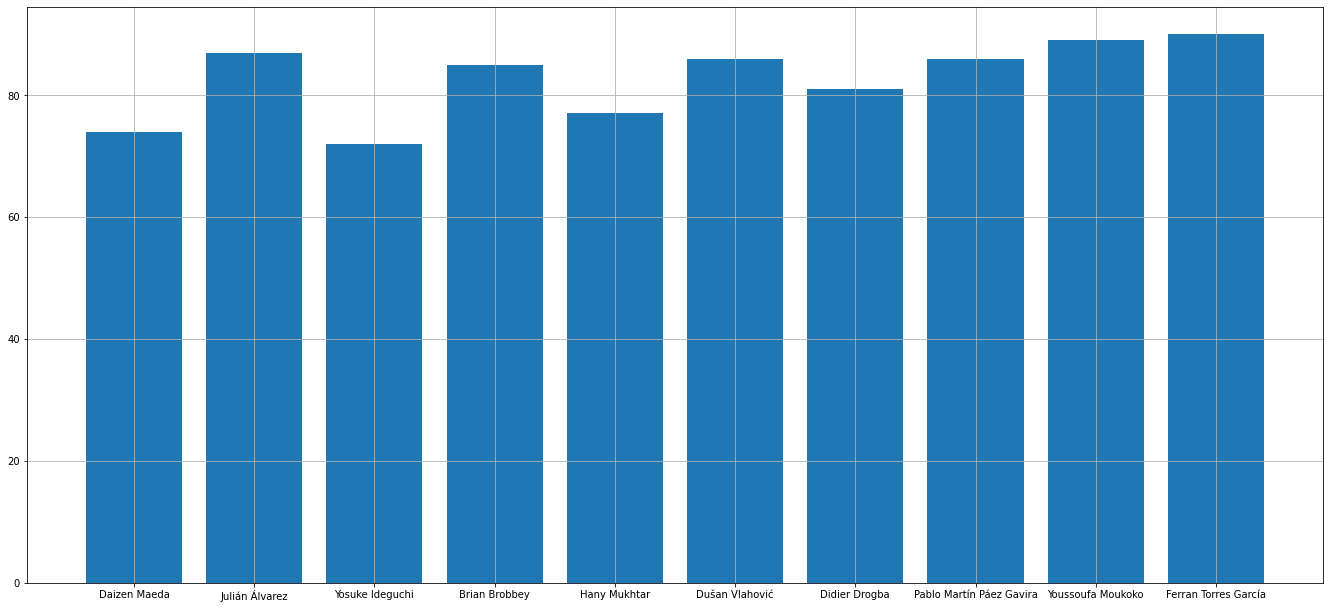

In [206]:
fig = plt.figure()
ax = fig.add_axes([1,1,3,2])
x = df["Name"].head(10)
y = df["POT"].head(10)
ax.bar(x,y  )
ax.grid()

### Graph -> Player's Name v/s Player's Wage

Text(0, 0.5, "Player's Wage")

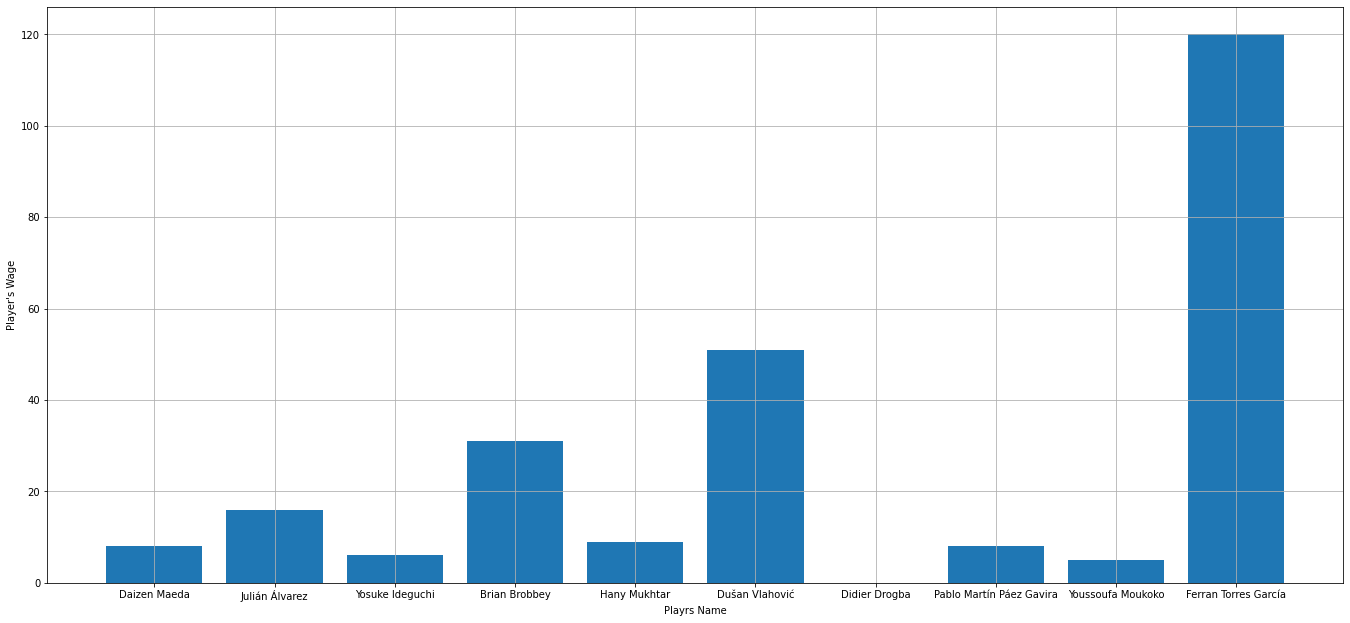

In [209]:
fig = plt.figure()
ax = fig.add_axes([1,1,3,2])
x = fifa_final["Name"].head(10)
y = fifa_final["Wage"].head(10)
ax.bar(x,y  )
ax.grid()
ax.set_xlabel("Playrs Name")
ax.set_ylabel("Player's Wage")


### Find the players whose potential is more than 90

In [218]:
print(fifa_final[fifa_final["POT"]>=90]["Name"],fifa_final[fifa_final["POT"]>=90]["POT"])

9                 Ferran Torres García
16                      Erling Haaland
18                    Ryan Gravenberch
27                       Florian Wirtz
32                      Anssumane Fati
34    Vinícius José de Oliveira Júnior
36                Pedro González López
41                     Mason Greenwood
57                     Federico Chiesa
59        C. Ronaldo dos Santos Aveiro
Name: Name, dtype: object 9     90
16    94
18    90
27    90
32    90
34    91
36    91
41    90
57    90
59    91
Name: POT, dtype: int64


In [217]:
fifa_final[fifa_final["POT"]>=90]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
9,Ferran Torres García,21,82,90,Manchester City,68.5,120,1996
16,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2112
18,Ryan Gravenberch,19,78,90,Ajax,33.0,11,2072
27,Florian Wirtz,18,80,90,Bayer 04 Leverkusen,44.5,20,1958
32,Anssumane Fati,18,78,90,FC Barcelona,32.5,51,1835
34,Vinícius José de Oliveira Júnior,20,83,91,Real Madrid CF,79.5,150,1960
36,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023
41,Mason Greenwood,19,79,90,Manchester United,38.0,62,1970
57,Federico Chiesa,23,84,90,Juventus,66.5,81,2064
59,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2202


### Find all the players whose Potential is more than 90 and the age < 20

In [228]:
fifa_final[(fifa_final["POT"]>=90) & (fifa_final["Age"]<20)]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
18,Ryan Gravenberch,19,78,90,Ajax,33.0,11,2072
27,Florian Wirtz,18,80,90,Bayer 04 Leverkusen,44.5,20,1958
32,Anssumane Fati,18,78,90,FC Barcelona,32.5,51,1835
36,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023
41,Mason Greenwood,19,79,90,Manchester United,38.0,62,1970


In [229]:
fifa_final[(fifa_final["POT"]>90) & (fifa_final["Age"]<20)]["Name"]

18        Ryan Gravenberch
27           Florian Wirtz
32          Anssumane Fati
36    Pedro González López
41         Mason Greenwood
Name: Name, dtype: object

### Find all the players whose values > 10 but wage <50

In [232]:
fifa_final[(fifa_final["Value"]>10) & (fifa_final["Wage"]<50)]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
1,Julián Álvarez,21,78,87,River Plate,32.0,16,2099
13,Antony Matheus dos Santos,21,81,89,Ajax,58.0,19,1987
15,Douglas Luiz Soares de Paulo,23,77,84,Aston Villa,20.0,47,1997
18,Ryan Gravenberch,19,78,90,Ajax,33.0,11,2072
19,Jurriën Timber,20,78,88,Ajax,29.0,12,1925
20,Gonçalo Bernardo Inácio,19,78,87,Sporting CP,28.5,8,1758
24,Joško Gvardiol,19,77,87,RB Leipzig,21.0,30,1990
25,Gabriel Teodoro Martinelli Silva,20,76,87,Arsenal,16.5,49,1883
27,Florian Wirtz,18,80,90,Bayer 04 Leverkusen,44.5,20,1958
28,Jonathan David,21,79,86,LOSC Lille,36.0,34,1872


In [233]:
fifa_final[(fifa_final["Value"]>10) & (fifa_final["Wage"]<50)]["Name"]

1                        Julián Álvarez
13            Antony Matheus dos Santos
15         Douglas Luiz Soares de Paulo
18                     Ryan Gravenberch
19                       Jurriën Timber
20              Gonçalo Bernardo Inácio
24                       Joško Gvardiol
25     Gabriel Teodoro Martinelli Silva
27                        Florian Wirtz
28                       Jonathan David
30             Yeremi Jesús Santos Pino
31                      Jude Bellingham
43                          Sven Botman
46                         Noni Madueke
47                    Eduardo Camavinga
49                       Jonathan Ikoné
50                        Thiago Almada
55                        Jamal Musiala
297                     Boubacar Kamara
359                        Darwin Núñez
477                Charles De Ketelaere
536            Rafael da Conceição Leão
595                         André Onana
Name: Name, dtype: object

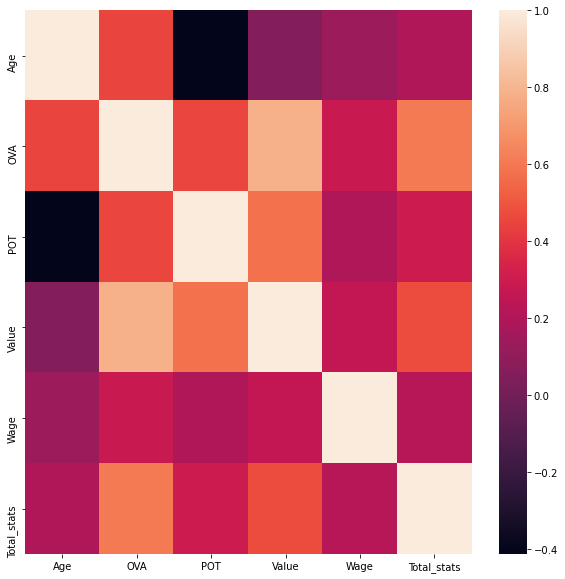

In [234]:
plt.figure(figsize=(10,10))
sns.heatmap(fifa_final.corr())

In [236]:
fifa_final.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.448914,-0.412179,0.061743,0.134773,0.194989
OVA,0.448914,1.000000,0.457070,0.788171,0.283139,0.605433
POT,-0.412179,0.457070,1.000000,0.577301,0.195131,0.297954
Value,0.061743,0.788171,0.577301,1.000000,0.262907,0.472026
Wage,0.134773,0.283139,0.195131,0.262907,1.000000,0.227529
Total_stats,0.194989,0.605433,0.297954,0.472026,0.227529,1.000000


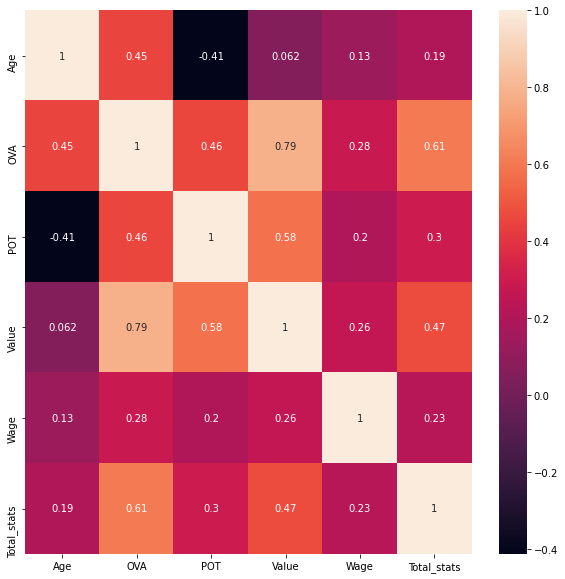

In [237]:
plt.figure(figsize=(10,10))
sns.heatmap(fifa_final.corr(), annot=True)